In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
filepath = r'C:\Users\01\Downloads\climate_nasa.csv'
data = pd.read_csv(filepath)


In [3]:
df=data.copy()

In [4]:
data.to_csv('dat_final.csv')

In [5]:
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [6]:
df['date']=pd.to_datetime(df['date'],errors='coerce').dt.date

In [7]:
df['date'].isna().sum()

0

In [8]:
df['date'].notna().sum()

522

In [9]:
df.shape

(522, 5)

In [10]:
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [11]:
df = df.sort_values(by='date', ascending=True).reset_index(drop=True)


In [12]:
df.head()

,date,likesCount,profileName,commentsCount,text
0,2020-09-15,5,f6ed8f13212babcab445115a686a84d7857d1b5ddae12c...,1.0,"Wow! Well, I suppose the ultimate expert on GW..."
1,2020-09-15,8,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,NaN,After all these decades protecting and informi...
2,2020-09-15,0,2cb97e19d185de75375330aad48239a52df4b6dc5e0a66...,NaN,NaN
3,2020-09-15,11,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,NaN,Also people are forgetting about the delay fac...
4,2020-09-15,2,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,NaN,I’m in southern Ontario Canada and we are bla...


In [13]:
df.shape

(522, 5)

DATA cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [17]:
print(df['text'].sample(10).values)


['If climate action is also important to you, don’t miss this week’s Firelight Chat on Wednesday – Climate: Where We Are and What to Do. Marianne will be joined by Peter Kalmus, climate scientist and author of Being the Change: Live Well and Spark a Climate Revolution.\nYou can watch the stream live directly on our website, marianne2024.com, or follow on Facebook, Twitter, or YouTube this Wednesday, July 12th at 6pm ET/ 3pm PT.'
 'From another site\n\nThe climate change hoax has collapsed. A devastating series of research papers has just been published, revealing that human activity can account for no more than a .01°C rise in global temperatures, meaning that all the human activity targeted by radical climate change alarmists — combustion engines, airplane flights, diesel tractors — has virtually no measurable impact on the temperature of the planet.\n\nFinnish scientists spearheaded the research, releasing a paper entitled, “No Experimental Evidence for the Significant Anthropogenic 

In [18]:
print(df.isnull().sum())
print((df['text'].str.strip() == '').sum())

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64
0


In [19]:
df = df.dropna(subset=['text'])
df['commentsCount']=df['commentsCount'].fillna(0)


In [20]:
df.isnull().sum()

date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64

In [21]:
df.shape

(504, 5)

In [22]:
df.duplicated(subset='text').sum()

1

In [23]:
df[df.duplicated(subset='text',keep=False)]


,date,likesCount,profileName,commentsCount,text
416,2023-01-06,0,9c062b981d13fec8c3dd59d1c7b059bd8c9e38a0788c20...,0.0,The “greenhouse effect” is concerned with the ...
417,2023-01-06,0,9c062b981d13fec8c3dd59d1c7b059bd8c9e38a0788c20...,0.0,The “greenhouse effect” is concerned with the ...


In [24]:
df = df.drop_duplicates(subset='text', keep='first')


In [25]:
df = df.copy()

In [26]:
import re

def has_weird_char(text):
    return bool(re.search(r'[^a-zA-Z0-9\s.,!?]', text))

df['weird_chars'] = df['text'].apply(has_weird_char)
print(df['weird_chars'].value_counts())


weird_chars
True     270
False    233
Name: count, dtype: int64


In [27]:
df[df['weird_chars'] == True]['text'].head(10).values


array(["Wow! Well, I suppose the ultimate expert on GW is Mother Nature. Just saying I think she's trying to tell us something. No matter whose at fault or whether our changing weather patterns are cyclical maybe we ought to put out heads together and figure out the future of our planet for our kids and grandkids. Thanks 🌡️",
       'After all these decades protecting and informing Americans...thank you for your continued service and precision as the challenges of climate impacts arrive in full. May we all do better to mitigate, build resiliency, and use credible science in response. #NCA4 #SR15 #BuildBackBetter #SprintOnClimate',
       'Also people are forgetting about the delay factor when it comes to greenhouse gases.  The warming we are experiencing today is from decades past.  Like a pot of water on the stove it doesn’t come to a boil immediately. I’m really nervous on how this planet is going to look in my 60s and 70s....If I make it that far',
       'I’m in southern Ontario Ca

In [28]:




def remove_emojis_unicode(text):
    emoji_pattern = re.compile(
        "[" 
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002500-\U00002BEF"  # other symbols
        "\U00002700-\U000027BF"  # dingbats
        "\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
        "\U0001FA70-\U0001FAFF"  # more recent emojis
        "\U0001F018-\U0001F270"
        "\U0001F680-\U0001F6C5"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)




df['clean_text'] = df['text'].apply(remove_emojis_unicode)


In [29]:
def full_clean(text):
    text = re.sub(r"http\S+", "", text)         # remove URLs
    text = re.sub(r"@\w+", "", text)            # remove mentions
    text = re.sub(r"#\w+", "", text)            # remove hashtags
    text = re.sub(r"&\w+;", "", text)           # remove HTML entities
    text = re.sub(r'[^\w\s.,!?]', '', text)     # remove special symbols
    text = text.lower().strip()                 # lowercase and trim
    return text

df['clean_text'] = df['text'].apply(full_clean)


In [30]:
df['text_length'] = df['text'].str.split().apply(len)
df['text_length'].describe()



count     503.00000
mean       29.66004
std        70.93593
min         1.00000
25%         7.00000
50%        16.00000
75%        32.50000
max      1327.00000
Name: text_length, dtype: float64

In [31]:
df['weird_chars'] = df['clean_text'].apply(has_weird_char)
print(df['weird_chars'].value_counts())


weird_chars
False    490
True      13
Name: count, dtype: int64


In [32]:
df[df['weird_chars'] == True]['clean_text'].head(13).values


array(['pensé que estaba sola en el tema de salvar el planeta ,yo lo estoy haciendo desde mi trabajo aunque no les guste a mi jefe yo evito utilizar hojas de papel para de esta manera ayudar  al planeta que se quede sin menos árboles a las grandes industria esto no les importa ni a mi jefe tampoco pero a mí si menos escrito menos copia y así .no habrá deforestación y tendremos un aire limpio para respirar',
       'lokepasa ke usa tiran mucho plástico y eso está echando a perder losdrenajes las aguas del mar y animales mueren por eso en méxico fas alatienda y llano tedan el mandado embolsa ya notaron eso',
       'all this is the real truth but only our president dont beleived he is the one that have to support all this catástrofe with all the texes we paid he has to serve us not us we pay him to work for us country why we have to beg for help. its not right.',
       'es triste todo lo que esta pasando todo se destruye por todas \ncompañías\nluego no siembran nada de árboles yo\nen mi

In [33]:


def has_weird_char(text):
    # Accept all Unicode letters, digits, and common punctuation
    return bool(re.search(r'[^\w\s.,!?]', text))
df['weird_chars'] = df['clean_text'].apply(has_weird_char)
print(df['weird_chars'].value_counts())


weird_chars
False    503
Name: count, dtype: int64


In [34]:
df.head()

,date,likesCount,profileName,commentsCount,text,weird_chars,clean_text,text_length
0,2020-09-15,5,f6ed8f13212babcab445115a686a84d7857d1b5ddae12c...,1.0,"Wow! Well, I suppose the ultimate expert on GW...",False,"wow! well, i suppose the ultimate expert on gw...",58
1,2020-09-15,8,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,0.0,After all these decades protecting and informi...,False,after all these decades protecting and informi...,43
3,2020-09-15,11,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,0.0,Also people are forgetting about the delay fac...,False,also people are forgetting about the delay fac...,60
4,2020-09-15,2,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,0.0,I’m in southern Ontario Canada and we are bla...,False,im in southern ontario canada and we are blan...,23
6,2020-09-15,1,122036c23d00d76fe1cf608db9b0a94322d507f90fd2b1...,0.0,Save the planet 🌎,False,save the planet,4


In [35]:
uncleared_data = ['.', ',', '.98 lowest smoothing', ',theres still plenty of  flat earthers around.']

df_filtered = df[
    df['clean_text'].isin(uncleared_data) |
    df['clean_text'].isnull() |
    df['clean_text'].astype(str).str.strip().isin(['', 'nan', 'none'])
]
df_filtered

,date,likesCount,profileName,commentsCount,text,weird_chars,clean_text,text_length
130,2020-09-16,0,d99b46bc88966b3e4ec0e525959e7f067066b1f5ba5ffb...,0.0,😃👏👦.,False,.,1
188,2021-09-23,0,dcde8615a107561ca6f3f6396cde46c4cfb0c02a38949a...,0.0,.98 Lowest smoothing,False,.98 lowest smoothing,3
217,2021-09-23,0,5cc8efc361a105e1e6a89cf2a868b47798778f6d1272ac...,0.0,😲,False,,1
225,2021-09-23,0,f73ea951193cb14258aa44144cdbf5c104c58c056380e7...,0.0,😳,False,,1
305,2022-09-10,1,2ce6b8f5325d3c0bf040cb0217f44291b9fcff904147bf...,0.0,💖💖💖,False,,1
306,2022-09-10,0,762d3f1c9ffca107e249668bbbb75da8f133bde1c4bdf6...,0.0,*********,False,,1
331,2022-10-26,1,cce391163de17a4148530124451c2f7d8d9785723f6d95...,2.0,#ClimateChange #JPL #Anthropocene\n[https://ww...,False,,4
378,2022-12-22,0,0cc879e72726bd6a3cf2b4042c3b2b36c2cbbe9a24fce2...,0.0,🙂🙂🙂,False,,1
398,2022-12-23,0,a321d07856a13a582ae21d8250d70c3d1aebf5d6b2a6cb...,0.0,🇺🇸🌎,False,,1
401,2022-12-23,0,1438243e6e436c837a4790d5dc3c78d4e470639fb4bb50...,0.0,‘,False,,1


In [36]:
df = df[df['clean_text'] != '']


In [37]:
def remove_leading_punctuation(text):
    return re.sub(r'^[.,!?]+', '',str(text)).strip()
uncleared_data = ['.', ',', '.98 lowest smoothing', ',theres still plenty of  flat earthers around.']

cleaned_data = [remove_leading_punctuation(text) for text in uncleared_data]
df['clean_text'] = df['clean_text'].astype(str).apply(remove_leading_punctuation)


In [38]:
df = df[df['clean_text'] != '']

In [39]:
#uncleared_data = ['.', ',', '.98 lowest smoothing', ',theres still plenty of  flat earthers around.']

df_filtered = df[
    df['clean_text'].isin(uncleared_data) |
    df['clean_text'].isnull() |
    df['clean_text'].astype(str).str.strip().isin(['', 'nan', 'none'])
]
df_filtered


,date,likesCount,profileName,commentsCount,text,weird_chars,clean_text,text_length


In [40]:
!pip install textblob


In [41]:
from textblob import TextBlob

In [42]:
def get_sentiment (text):
    return TextBlob(text).sentiment.polarity

In [43]:
df['sentiment_score']=df['clean_text'].apply(get_sentiment)

In [44]:
def claasify_sentiment (score):
    if score > 0 :
        return 'Positive'
    elif score < 0 :
        return 'Negative'
    else:
        return 'Neutral'
  

df['textblob_sentiment']=df['sentiment_score'].apply(claasify_sentiment)

In [45]:
df.head()

,date,likesCount,profileName,commentsCount,text,weird_chars,clean_text,text_length,sentiment_score,textblob_sentiment
0,2020-09-15,5,f6ed8f13212babcab445115a686a84d7857d1b5ddae12c...,1.0,"Wow! Well, I suppose the ultimate expert on GW...",False,"wow! well, i suppose the ultimate expert on gw...",58,0.081250,Positive
1,2020-09-15,8,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,0.0,After all these decades protecting and informi...,False,after all these decades protecting and informi...,43,0.416667,Positive
3,2020-09-15,11,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,0.0,Also people are forgetting about the delay fac...,False,also people are forgetting about the delay fac...,60,0.016667,Positive
4,2020-09-15,2,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,0.0,I’m in southern Ontario Canada and we are bla...,False,im in southern ontario canada and we are blan...,23,0.000000,Neutral
6,2020-09-15,1,122036c23d00d76fe1cf608db9b0a94322d507f90fd2b1...,0.0,Save the planet 🌎,False,save the planet,4,0.000000,Neutral


In [46]:

df['textblob_sentiment'].value_counts()

textblob_sentiment
Positive    204
Neutral     189
Negative     94
Name: count, dtype: int64

vaderSentiment analysis


In [48]:
!pip install vaderSentiment

In [49]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [50]:
df['vader_scores'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(x))
df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])
df['vader_sentiment'] = df['vader_compound'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))


In [51]:
df.head()

,date,likesCount,profileName,commentsCount,text,weird_chars,clean_text,text_length,sentiment_score,textblob_sentiment,vader_scores,vader_compound,vader_sentiment
0,2020-09-15,5,f6ed8f13212babcab445115a686a84d7857d1b5ddae12c...,1.0,"Wow! Well, I suppose the ultimate expert on GW...",False,"wow! well, i suppose the ultimate expert on gw...",58,0.081250,Positive,"{'neg': 0.058, 'neu': 0.802, 'pos': 0.14, 'com...",0.7444,Positive
1,2020-09-15,8,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,0.0,After all these decades protecting and informi...,False,after all these decades protecting and informi...,43,0.416667,Positive,"{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'comp...",0.4939,Positive
3,2020-09-15,11,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,0.0,Also people are forgetting about the delay fac...,False,also people are forgetting about the delay fac...,60,0.016667,Positive,"{'neg': 0.072, 'neu': 0.864, 'pos': 0.063, 'co...",-0.1513,Negative
4,2020-09-15,2,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,0.0,I’m in southern Ontario Canada and we are bla...,False,im in southern ontario canada and we are blan...,23,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
6,2020-09-15,1,122036c23d00d76fe1cf608db9b0a94322d507f90fd2b1...,0.0,Save the planet 🌎,False,save the planet,4,0.000000,Neutral,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.4939,Positive


In [52]:
df['vader_sentiment'].value_counts() 

vader_sentiment
Positive    193
Neutral     160
Negative    134
Name: count, dtype: int64

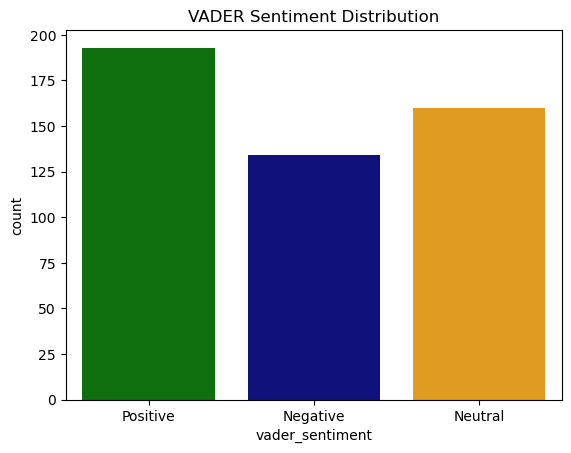

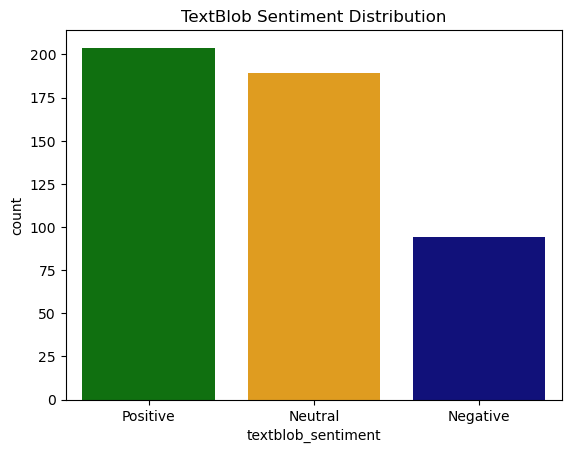

In [54]:
daily_sentiment = df.groupby('date')['vader_compound'].mean().reset_index()

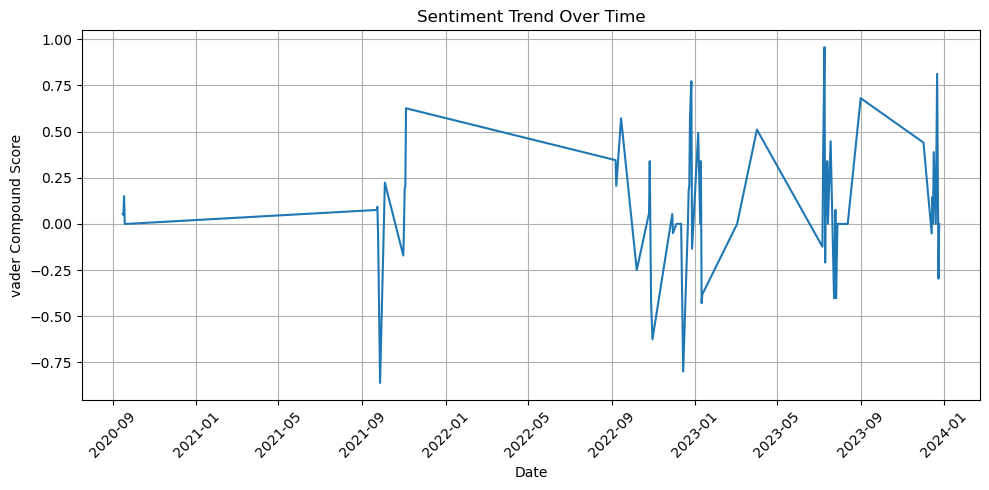

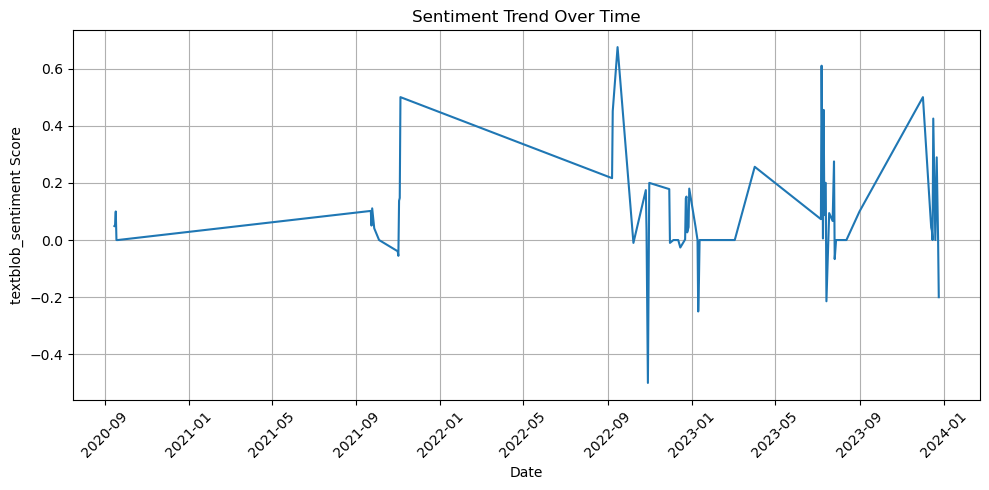


BERT based analysis with 3 sentiment model 

In [57]:
!pip install torch
!pip install transformers
!pip install transformers torch -q

In [58]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [59]:
def chunk_tokens(text, tokenizer, max_tokens=510):
    token_ids = tokenizer.encode(text, add_special_tokens=False)
    return [token_ids[i:i + max_tokens] for i in range(0, len(token_ids), max_tokens)]



In [60]:
model1_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer1 = AutoTokenizer.from_pretrained(model1_name)
model1 = AutoModelForSequenceClassification.from_pretrained(model1_name)
model1.eval()

def analyze_model1(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"
    
    chunks = chunk_tokens(text, tokenizer1)
    ratings = []

    for chunk in chunks:
        input_ids = tokenizer1.build_inputs_with_special_tokens(chunk)
        input_tensor = torch.tensor([input_ids])
        with torch.no_grad():
            outputs = model1(input_tensor)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        rating = torch.argmax(probs).item() + 1
        ratings.append(rating)

    avg_rating = np.mean(ratings)
    if avg_rating <= 2:
        return "Negative"
    elif avg_rating == 3:
        return "Neutral"
    else:
        return "Positive"


In [61]:
model2_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer2 = AutoTokenizer.from_pretrained(model2_name)
model2 = AutoModelForSequenceClassification.from_pretrained(model2_name)
model2.eval()

label_map2 = {0: "Negative", 1: "Neutral", 2: "Positive"}

def analyze_model2(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"

    chunks = chunk_tokens(text, tokenizer2)
    labels = []

    for chunk in chunks:
        input_ids = tokenizer2.build_inputs_with_special_tokens(chunk)
        input_tensor = torch.tensor([input_ids])
        with torch.no_grad():
            outputs = model2(input_tensor)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        label = torch.argmax(probs).item()
        labels.append(label)

    avg_label = round(np.mean(labels))
    return label_map2.get(avg_label, "Neutral")


In [62]:
model3_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer3 = AutoTokenizer.from_pretrained(model3_name)
model3 = AutoModelForSequenceClassification.from_pretrained(model3_name)
model3.eval()

label_map3 = {0: "Negative", 1: "Positive"}

def analyze_model3(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"

    chunks = chunk_tokens(text, tokenizer3)
    labels = []

    for chunk in chunks:
        input_ids = tokenizer3.build_inputs_with_special_tokens(chunk)
        input_tensor = torch.tensor([input_ids])
        with torch.no_grad():
            outputs = model3(input_tensor)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        label = torch.argmax(probs).item()
        labels.append(label)

    avg_label = round(np.mean(labels))
    return label_map3.get(avg_label, "Neutral")


In [63]:
df['sentiment_model1'] = df['clean_text'].apply(analyze_model1)



Token indices sequence length is longer than the specified maximum sequence length for this model (1694 > 512). Running this sequence through the model will result in indexing errors


In [64]:
df['sentiment_model2'] = df['clean_text'].apply(analyze_model2)

In [65]:
df['sentiment_model3'] = df['clean_text'].apply(analyze_model3)

Token indices sequence length is longer than the specified maximum sequence length for this model (1626 > 512). Running this sequence through the model will result in indexing errors


C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


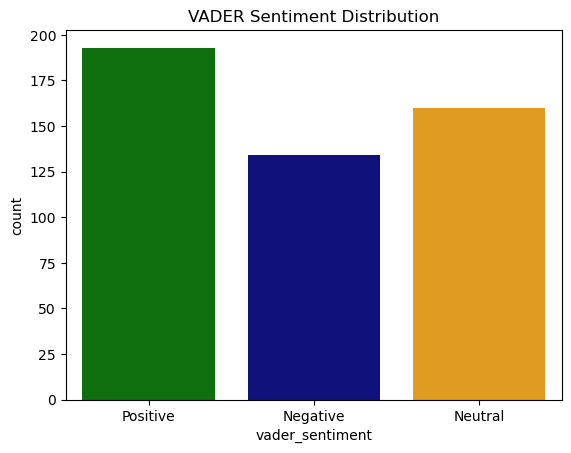

C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


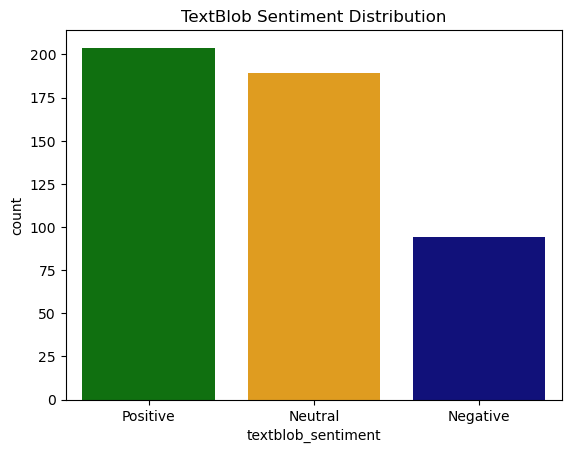

C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


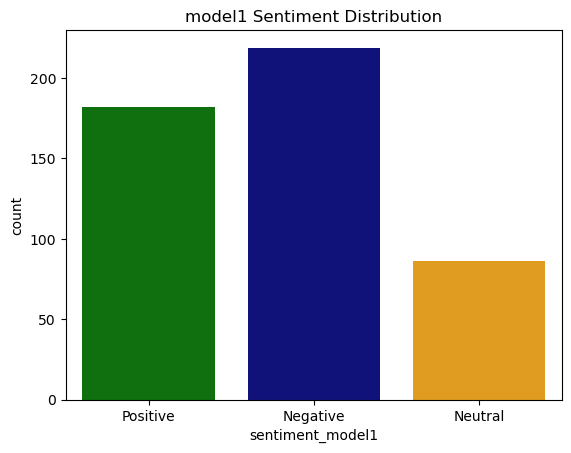

C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


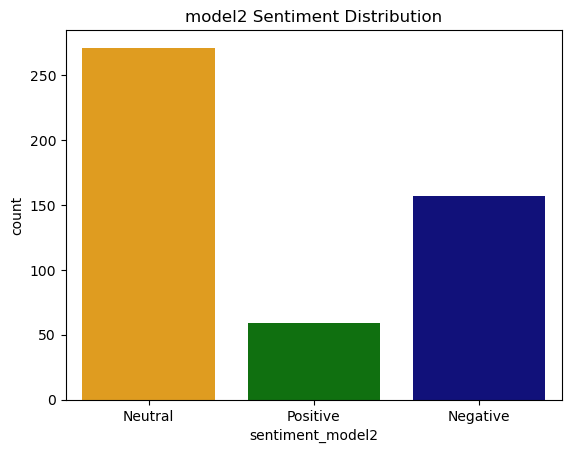

C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


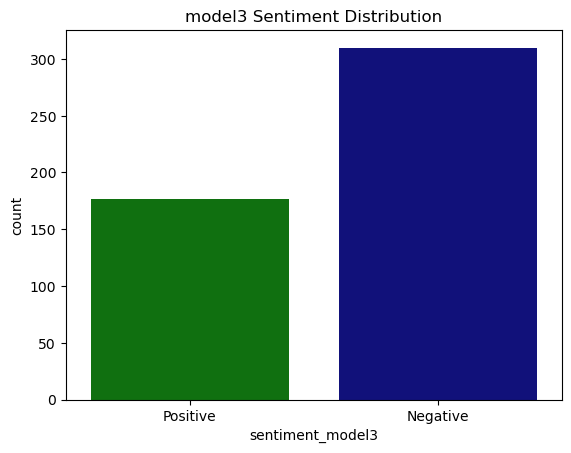

In [181]:
sentiment_palette = {
    'Positive': 'green',
    'Neutral': 'orange',
    'Negative': 'darkblue'
}

sns.countplot(x='vader_sentiment', data=df,palette=sentiment_palette)
plt.title('VADER Sentiment Distribution')
plt.show()


sns.countplot(x='textblob_sentiment', data=df,palette=sentiment_palette)
plt.title('TextBlob Sentiment Distribution')
plt.show()



sns.countplot(x='sentiment_model1', data=df,palette=sentiment_palette)
plt.title('model1 Sentiment Distribution')
plt.show()


sns.countplot(x='sentiment_model2', data=df,palette=sentiment_palette)
plt.title('model2 Sentiment Distribution')
plt.show()

sns.countplot(x='sentiment_model3', data=df,palette=sentiment_palette)
plt.title('model3 Sentiment Distribution')
plt.show()

In [66]:
df_analysis=df[['clean_text', 'vader_sentiment', 'textblob_sentiment', 
    'sentiment_model1', 'sentiment_model2', 'sentiment_model3']]

df_analysis.to_csv('df_analysis.csv')




In [67]:

sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

wedf['vader_score'] = df['vader_sentiment'].map(sentiment_map)
df['textblob_score'] = df['textblob_sentiment'].map(sentiment_map)
df['model1_score'] = df['sentiment_model1'].map(sentiment_map)
df['model2_score'] = df['sentiment_model2'].map(sentiment_map)
df['model3_score'] = df['sentiment_model3'].map(sentiment_map)

# Check correlation with engagement (e.g., likesCount)
print(df[['likesCount', 'vader_score', 'textblob_score', 'model1_score', 'model2_score', 'model3_score']].corr())


                likesCount  vader_score  textblob_score  model1_score  \
likesCount        1.000000     0.000062        0.081282     -0.017741   
vader_score       0.000062     1.000000        0.415023      0.303977   
textblob_score    0.081282     0.415023        1.000000      0.216366   
model1_score     -0.017741     0.303977        0.216366      1.000000   
model2_score     -0.009432     0.438508        0.294261      0.427645   
model3_score      0.034720     0.282120        0.216726      0.516724   

                model2_score  model3_score  
likesCount         -0.009432      0.034720  
vader_score         0.438508      0.282120  
textblob_score      0.294261      0.216726  
model1_score        0.427645      0.516724  
model2_score        1.000000      0.454697  
model3_score        0.454697      1.000000  


C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


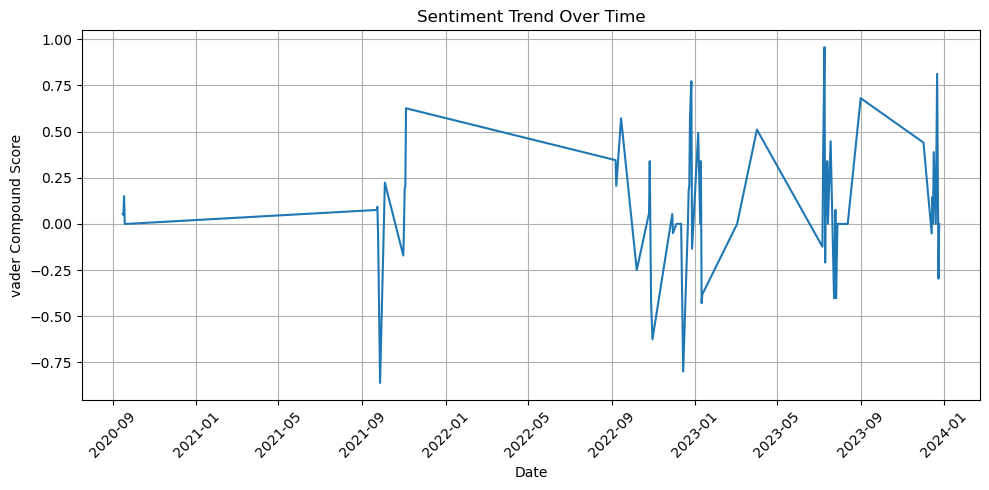

C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


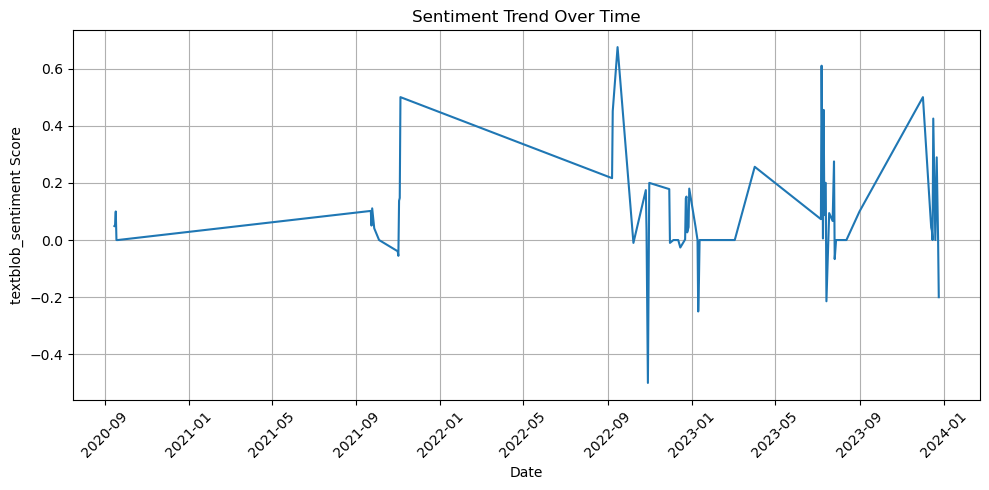

C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


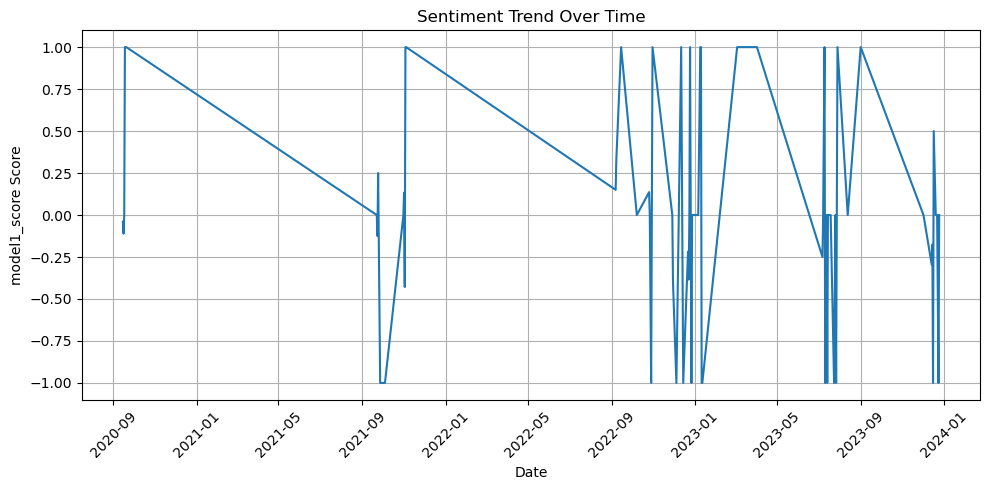

C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


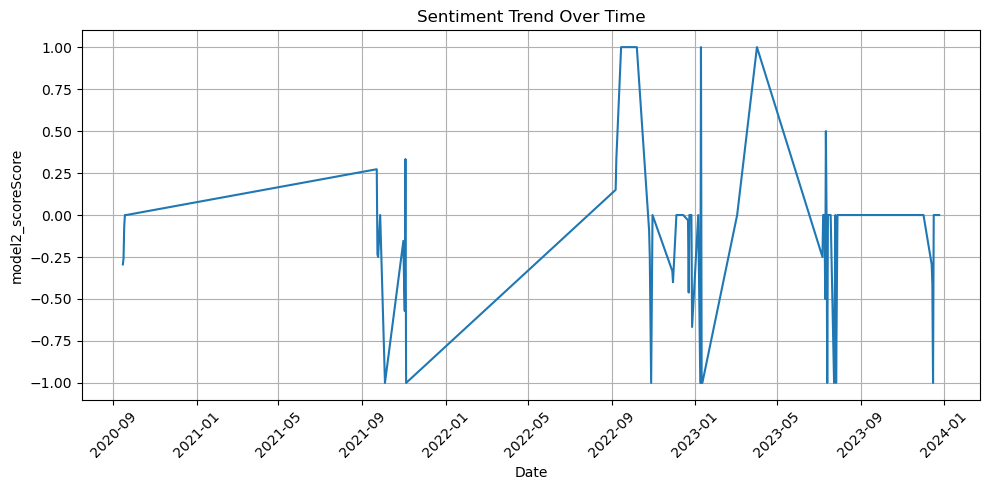

C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\01\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


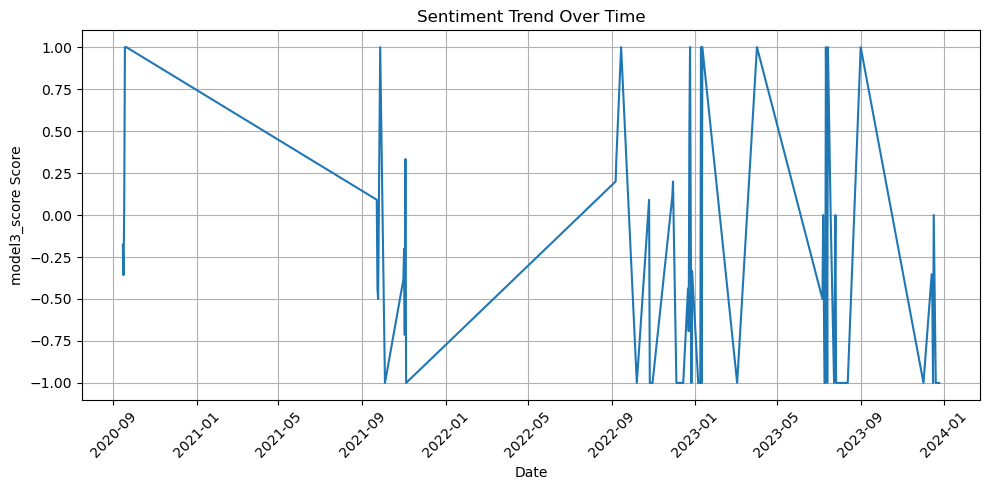

In [183]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='vader_compound', data=df,ci=None)
plt.title('Sentiment Trend Over Time')
plt.ylabel('vader Compound Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_trend.png')

plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='sentiment_score', data=df,ci=None)
plt.title('Sentiment Trend Over Time')
plt.ylabel('textblob_sentiment Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_trend.png')

plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='model1_score', data=df,ci=None)
plt.title('Sentiment Trend Over Time')
plt.ylabel('model1_score Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_trend.png')

plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='model2_score', data=df,ci=None)
plt.title('Sentiment Trend Over Time')
plt.ylabel('model2_scoreScore')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_trend.png')

plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='model3_score', data=df,ci=None)
plt.title('Sentiment Trend Over Time')
plt.ylabel('model3_score Score')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_trend.png')

plt.show()

    

Trend Analysis

In [69]:
df.head()

,date,likesCount,profileName,commentsCount,text,weird_chars,clean_text,text_length,sentiment_score,textblob_sentiment,...,vader_compound,vader_sentiment,sentiment_model1,sentiment_model2,sentiment_model3,vader_score,textblob_score,model1_score,model2_score,model3_score
0,2020-09-15,5,f6ed8f13212babcab445115a686a84d7857d1b5ddae12c...,1.0,"Wow! Well, I suppose the ultimate expert on GW...",False,"wow! well, i suppose the ultimate expert on gw...",58,0.081250,Positive,...,0.7444,Positive,Positive,Neutral,Positive,1,1,1,0,1
1,2020-09-15,8,191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...,0.0,After all these decades protecting and informi...,False,after all these decades protecting and informi...,43,0.416667,Positive,...,0.4939,Positive,Positive,Positive,Positive,1,1,1,1,1
3,2020-09-15,11,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,0.0,Also people are forgetting about the delay fac...,False,also people are forgetting about the delay fac...,60,0.016667,Positive,...,-0.1513,Negative,Negative,Negative,Negative,-1,1,-1,-1,-1
4,2020-09-15,2,0bc1bc50b627dd342e3a0498e0f8240c99d4daf267ebea...,0.0,I’m in southern Ontario Canada and we are bla...,False,im in southern ontario canada and we are blan...,23,0.000000,Neutral,...,0.0000,Neutral,Negative,Neutral,Negative,0,0,-1,0,-1
6,2020-09-15,1,122036c23d00d76fe1cf608db9b0a94322d507f90fd2b1...,0.0,Save the planet 🌎,False,save the planet,4,0.000000,Neutral,...,0.4939,Positive,Negative,Neutral,Positive,1,0,-1,0,1


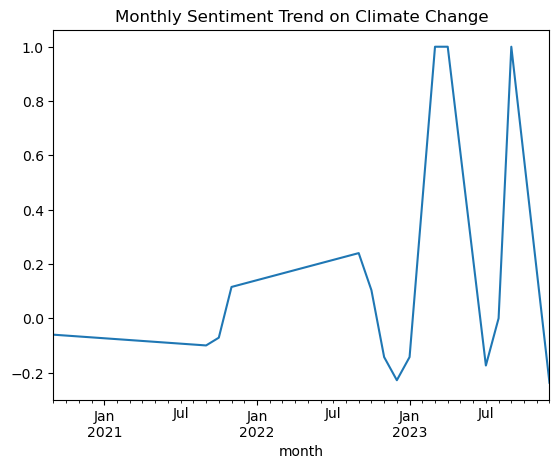

In [70]:


df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
sentiment_trend = df.groupby('month')['model1_score'].mean()
sentiment_trend.plot(title='Monthly Sentiment Trend on Climate Change')
plt.savefig("monthly_sentiment_trend.png", dpi=300)  # Saves the figure
plt.show() 


In [71]:
df.head(20)
df.to_csv('df.csv')

This graph illustrates public sentiment dynamics on climate change as expressed in comments under NASA’s Facebook posts. The sentiment trend highlights key shifts in public mood—ranging from early skepticism to heightened enthusiasm—likely influenced by NASA’s communication strategy and global climate events. The volatility in 2023 reflects an increasingly reactive and engaged online audience, underscoring the importance of clear and responsive climate communication.

In [73]:
df.columns.to_list()

['date',
 'likesCount',
 'profileName',
 'commentsCount',
 'text',
 'weird_chars',
 'clean_text',
 'text_length',
 'sentiment_score',
 'textblob_sentiment',
 'vader_scores',
 'vader_compound',
 'vader_sentiment',
 'sentiment_model1',
 'sentiment_model2',
 'sentiment_model3',
 'vader_score',
 'textblob_score',
 'model1_score',
 'model2_score',
 'model3_score',
 'month']

In [186]:
df[['likesCount','commentsCount','sentiment_score','vader_compound','model1_score','model2_score',
 'model3_score']].corr()

,likesCount,commentsCount,sentiment_score,vader_compound,model1_score,model2_score,model3_score
likesCount,1.000000,0.410951,0.032736,0.001086,-0.017741,-0.009432,0.034720
commentsCount,0.410951,1.000000,-0.044207,-0.063087,-0.122420,-0.076582,-0.069344
sentiment_score,0.032736,-0.044207,1.000000,0.479316,0.262888,0.408006,0.265160
vader_compound,0.001086,-0.063087,0.479316,1.000000,0.295504,0.469634,0.309339
model1_score,-0.017741,-0.122420,0.262888,0.295504,1.000000,0.427645,0.516724
model2_score,-0.009432,-0.076582,0.408006,0.469634,0.427645,1.000000,0.454697
model3_score,0.034720,-0.069344,0.265160,0.309339,0.516724,0.454697,1.000000


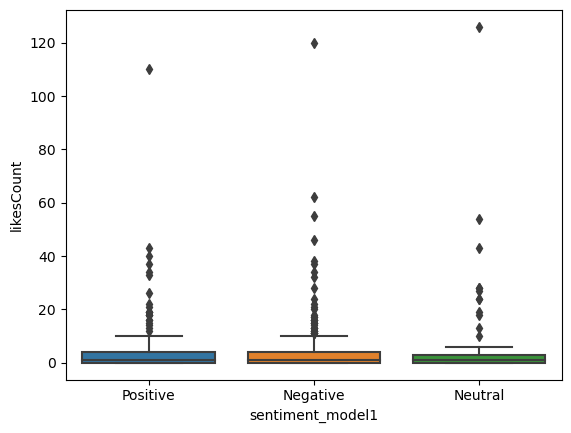

In [75]:
sns.boxplot(x='sentiment_model1', y='likesCount', data=df)
plt.savefig('sentiment_likes.png')


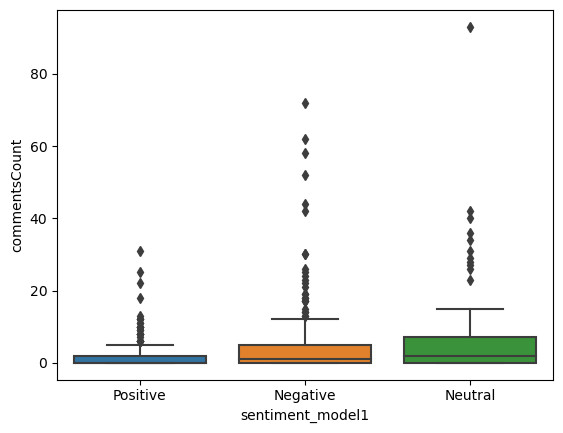

In [76]:
sns.boxplot(x='sentiment_model1', y='commentsCount', data=df)
plt.savefig('sentiment_box.png')


Topic Modeling on Climate Change Discussions

In [78]:
pip install nltk gensim pyLDAvis


Note: you may need to restart the kernel to use updated packages.


In [79]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import pyLDAvis.gensim_models
import pyLDAvis



In [80]:

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
def preprocess(text):
    stop_words = set(stopwords.words("english"))
    tokens = word_tokenize(text.lower())  # lowercasing + tokenization
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

df["tokens"] = df["clean_text"].apply(preprocess)


In [82]:
dictionary = corpora.Dictionary(df["tokens"])
corpus = [dictionary.doc2bow(tokens) for tokens in df["tokens"]]


In [83]:
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,           
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)


In [84]:
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic #{idx + 1}: {topic}")


Topic #1: 0.009*"climate" + 0.008*"dont" + 0.008*"change" + 0.008*"going" + 0.007*"science" + 0.006*"one" + 0.005*"like" + 0.005*"real" + 0.004*"global" + 0.004*"year"
Topic #2: 0.016*"years" + 0.009*"climate" + 0.009*"people" + 0.007*"earth" + 0.006*"temperature" + 0.006*"change" + 0.006*"year" + 0.005*"warming" + 0.005*"back" + 0.005*"global"
Topic #3: 0.011*"climate" + 0.010*"change" + 0.007*"need" + 0.007*"us" + 0.007*"energy" + 0.006*"nasa" + 0.005*"ice" + 0.005*"people" + 0.005*"age" + 0.004*"years"
Topic #4: 0.022*"climate" + 0.014*"change" + 0.009*"de" + 0.006*"nasa" + 0.005*"temperature" + 0.005*"anos" + 0.005*"carbon" + 0.004*"atmosphere" + 0.004*"earth" + 0.004*"scientists"
Topic #5: 0.013*"global" + 0.013*"warming" + 0.011*"earth" + 0.009*"carbon" + 0.007*"atmosphere" + 0.007*"dioxide" + 0.007*"planet" + 0.007*"water" + 0.006*"sea" + 0.006*"would"


In [85]:
pyLDAvis.enable_notebook()  
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


In [86]:

topics = lda_model.print_topics(num_words=10)


for idx, topic in topics:
    print(f"Topic #{idx + 1}:")
    print(topic)
    print("-" * 80)


Topic #1:
0.009*"climate" + 0.008*"dont" + 0.008*"change" + 0.008*"going" + 0.007*"science" + 0.006*"one" + 0.005*"like" + 0.005*"real" + 0.004*"global" + 0.004*"year"
--------------------------------------------------------------------------------
Topic #2:
0.016*"years" + 0.009*"climate" + 0.009*"people" + 0.007*"earth" + 0.006*"temperature" + 0.006*"change" + 0.006*"year" + 0.005*"warming" + 0.005*"back" + 0.005*"global"
--------------------------------------------------------------------------------
Topic #3:
0.011*"climate" + 0.010*"change" + 0.007*"need" + 0.007*"us" + 0.007*"energy" + 0.006*"nasa" + 0.005*"ice" + 0.005*"people" + 0.005*"age" + 0.004*"years"
--------------------------------------------------------------------------------
Topic #4:
0.022*"climate" + 0.014*"change" + 0.009*"de" + 0.006*"nasa" + 0.005*"temperature" + 0.005*"anos" + 0.005*"carbon" + 0.004*"atmosphere" + 0.004*"earth" + 0.004*"scientists"
---------------------------------------------------------------

The topic modeling output uncovers five distinct themes in public Facebook comments under NASA’s climate-related posts. These range from public skepticism and debate, to scientific discourse, environmental urgency, and multilingual discussions. This allows us to segment user responses and understand which themes dominate public perception—a powerful insight for improving targeted communication and educational outreach.